## Modelagem Preditiva de Salários

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm

## Carregando conjunto de dados

In [2]:
dataframe = pd.read_csv('Salary_Data.csv')

In [3]:
dataframe.shape

(30, 2)

In [4]:
dataframe.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Análise exploratória dos dados

In [5]:
#Verificar existencia de elementos nulos
dataframe.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
dataframe.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
dataframe.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Preparação e visualização dos dados

In [9]:
# Variável independente ou preditora x
x = np.array(dataframe['YearsExperience'])
#Variável dependente ou alvo y
y = np.array(dataframe['Salary'])

In [10]:
type(x)

numpy.ndarray

In [11]:
type(y)

numpy.ndarray

In [12]:
x = x.reshape(-1,1)

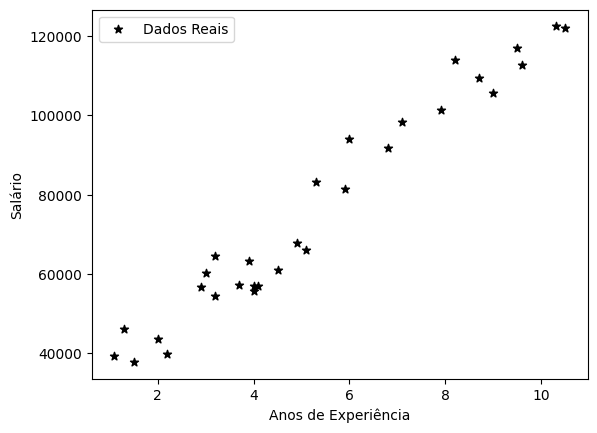

In [13]:
#grafico de dispersão dos dados reais entre x e y
plt.scatter(x,y, color = 'black', label = 'Dados Reais', marker='*')
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [14]:
#Dividir dados de treino e dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state=42)

## Modelo preditivo

In [15]:
# Cria modelo de regressão Linear simples
modeloRegL = lm.LinearRegression()

In [16]:
#Treinar modelo
modeloRegL.fit(x_treino, y_treino)

LinearRegression()

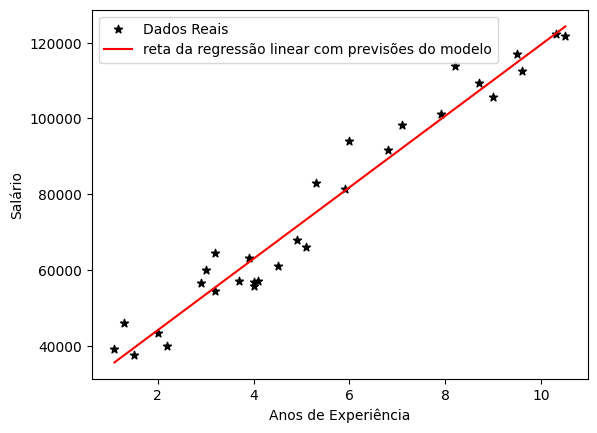

In [17]:
plt.scatter(x,y, color = 'black', label = 'Dados Reais', marker='*')
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.plot(x, modeloRegL.predict(x), color = 'red', label='reta da regressão linear com previsões do modelo')
plt.legend()
plt.show()

In [21]:
#Avaliar modelo de regressão com teste
r2 = modeloRegL.score(x_teste, y_teste)
print(f"R² = {r2}")

R² = 0.9024461774180497


In [22]:
#coeficiente linear
modeloRegL.intercept_

25321.583011776813

In [23]:
#coeficiente angular da reta
modeloRegL.coef_

array([9423.81532303])

## Deploy do modelo

In [25]:
import random

In [39]:
anos_de_experiencia = np.array([[10*random.random()]])

In [40]:
salario_previsto = modeloRegL.predict(anos_de_experiencia)

In [41]:
print(f"Para alguém com {anos_de_experiencia} anos de experiência o salário anual será de: {salario_previsto}" )

Para alguém com [[6.60835252]] anos de experiência o salário anual será de: [87597.47672698]
